## EE 242 Lab 4b – Digital Filtering - Applying Filters to Sound

Wheeler

This lab has 2 exercises to be completed as a team. Each should be given a separate code cell in your Notebook, followed by a markdown cell with report discussion. Your notebook should start with a markdown title and overview cell, which should be followed by an import cell that has the import statements for all assignments. For this assignment, you will need to import: numpy, the wavfile package from scipy.io, simpleaudio/librosa, and matplotlib.pyplot.  

In [2]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib notebook
import numpy as np
import matplotlib
import scipy.signal as sig
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal
import simpleaudio as sa
# import whatever other modules you use in this lab -- there are more that you need than we've included 

## Summary

In this lab, we will consider different types of digital filters (specifically discrete-time, linear, time-invariant filters) and look at their characterization in both time and frequency. This will give you some insight into how digital filters are implemented and into the properties of different digital filter design algorithms. You’ll also learn about some of the signal processing functions available from the signal module in the scipy package which will be useful for designing and implement filters.  You will work with examples that show you how filtering can be useful to remove noise and reshape the frequency content of a signal. Specifically, we’ll revisit the lab 2 problem of removing noise from signals (or smoothing signals), then explore filter design methods, and finally implement a simple audio equalizer. This is a 2-week lab. It is recommended to work on the first 2 assignments in the first week and the remaining 
assignments in the second week. 

## Lab 4b turn in checklist

•	Lab 4b Jupyter notebook with code for the 2 exercises assignment in separate cells. Each assignment cell should contain markdown cells (same as lab overview cells) for the responses to lab report questions. Include your lab members’ names at the top of the notebook.

**Please submit the report as PDF** (You may also use : https://www.vertopal.com/  suggested by a student)




In [3]:
# Helper functions
# Part A
def plot_mag_freq_response(b, a, plot_phase = False, fs = None):
    """
    This function plots the magnitude and phase of the frequency response
    of a filter given the filter coefficients a and b.
    """
    # Getting the frequency response
    w, h = signal.freqz(b, a)

    # Checking if a sampling frequency was provided
    if fs:
        # Convert from rad/sample to Hz
        w = w * fs / (2*np.pi)

    # Plotting the magnitude response
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2 if plot_phase else 1, 1)
    plt.plot(w, 20 * np.log10(abs(h)), 'b')
    plt.ylim([-100, 0])
    plt.ylabel('Amplitude [dB]', color='b')
    plt.xlabel('Frequency [{}Hz]'.format('' if fs else 'rad/sample'))

    if plot_phase:
        # Plotting the phase response on a second subplot
        plt.subplot(1, 2, 2)
        angles = np.unwrap(np.angle(h))
        plt.plot(w, angles, 'g')
        plt.ylabel('Angle (radians)', color='g')
        plt.grid()
        plt.xlabel('Frequency [{}Hz]'.format('' if fs else 'rad/sample'))

    plt.show()

# Part B
def plot_impulse_response(b, a, impulse_response_length):
    """
    This function computes and plots the impulse response of a filter given the
    filter coefficients a and b and a desired impulse response length.
    """
    # Creating the impulse signal
    impulse = np.zeros(impulse_response_length)
    impulse[0] = 1.0

    # Getting the impulse response
    x = signal.lfilter(b, a, impulse)

    # Plotting the impulse response
    plt.figure(figsize=(10, 4))
    plt.stem(x, use_line_collection=True)
    plt.ylabel('Amplitude')
    plt.xlabel('Samples')
    plt.show()

    return x

## Assignment 3 -- Filtering an Audio Signal

In this assignment, we’ll explore different filtering problems using the horn signal that you worked with in Labs 2 and 3. You will need the audio packages that you used in previous labs. This assignment will have three parts, A-C.

**A.** Read in the horn sound horn11short.wav. Design a highpass filter with a cutoff of 550Hz to remove the first harmonic. A Butterworth filter of order 8 should work. Plot the magnitude response and the impulse response of your filter.  Using the same section of the signal as in lab 3, compute the FFT of the original and the filtered signal, and plot the log magnitude frequency content in a 2x1 plot. Play the original and the filtered waveforms. 

**B.** Create a noisy version of the horn sound by generating a sequence of random noise, as in lab 2, but with a scaling factor of 1000, and then adding that to the horn signal. Plot the log magnitude of the frequency content for the two signals, as in part A. Play the resulting signal and confirm that the noise is audible.  

**C.** Design a lowpass filter with a cut-off corresponding to 1800Hz to remove the high frequency noise.  (You can use a lower cut-off to remove more noise, but then you start removing audible harmonics.) Plot the log magnitude response and the impulse response of the filter. Plot the frequency content of the filtered signal.

<IPython.core.display.Javascript object>


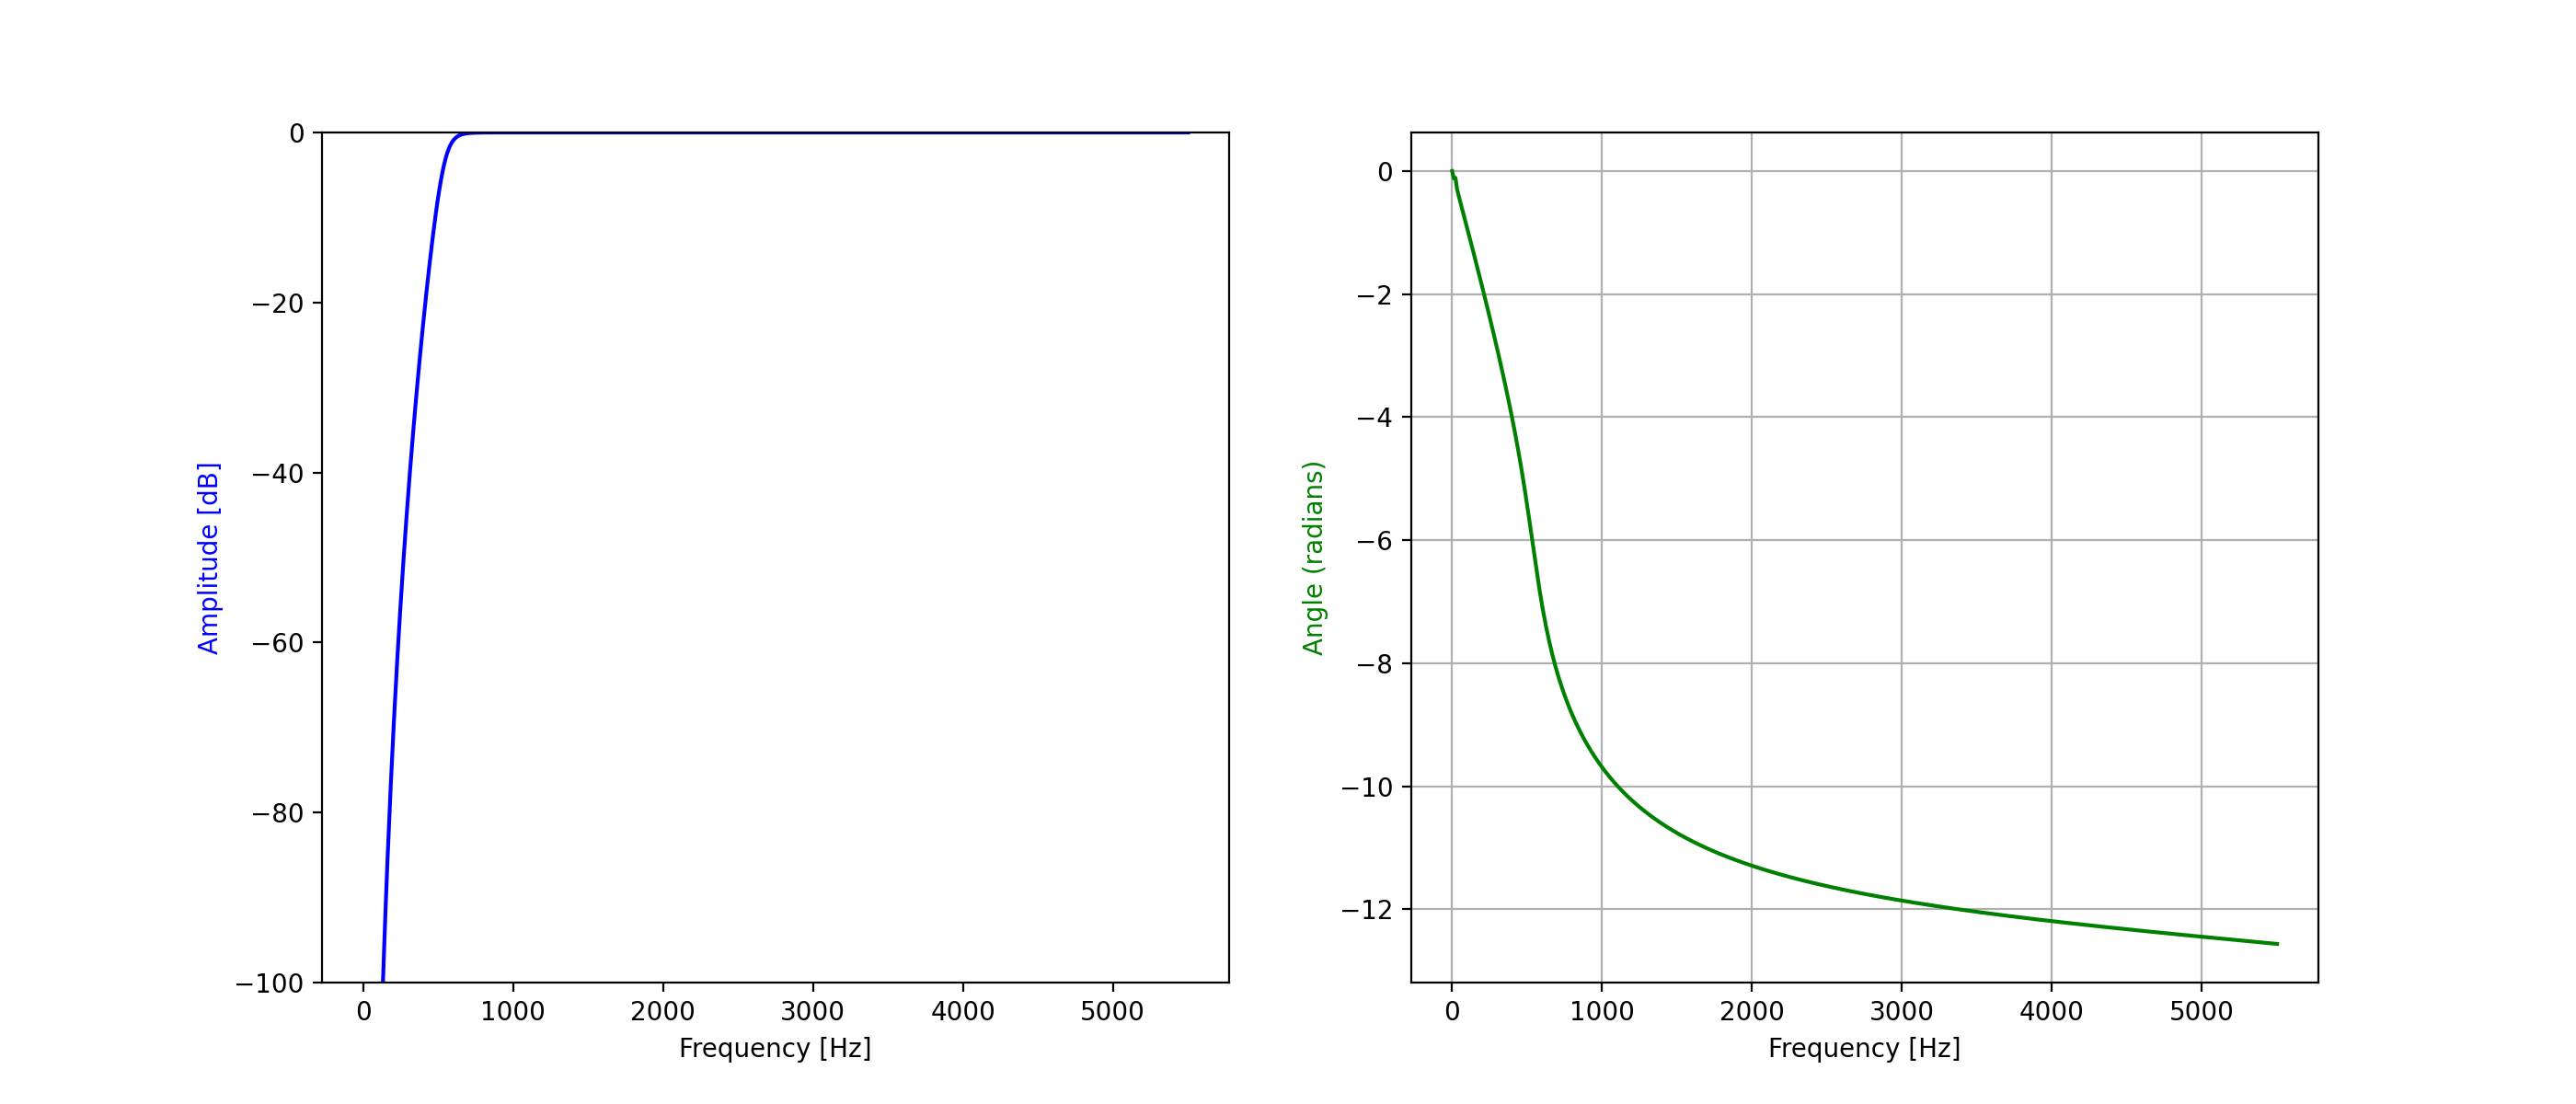

<IPython.core.display.Javascript object>


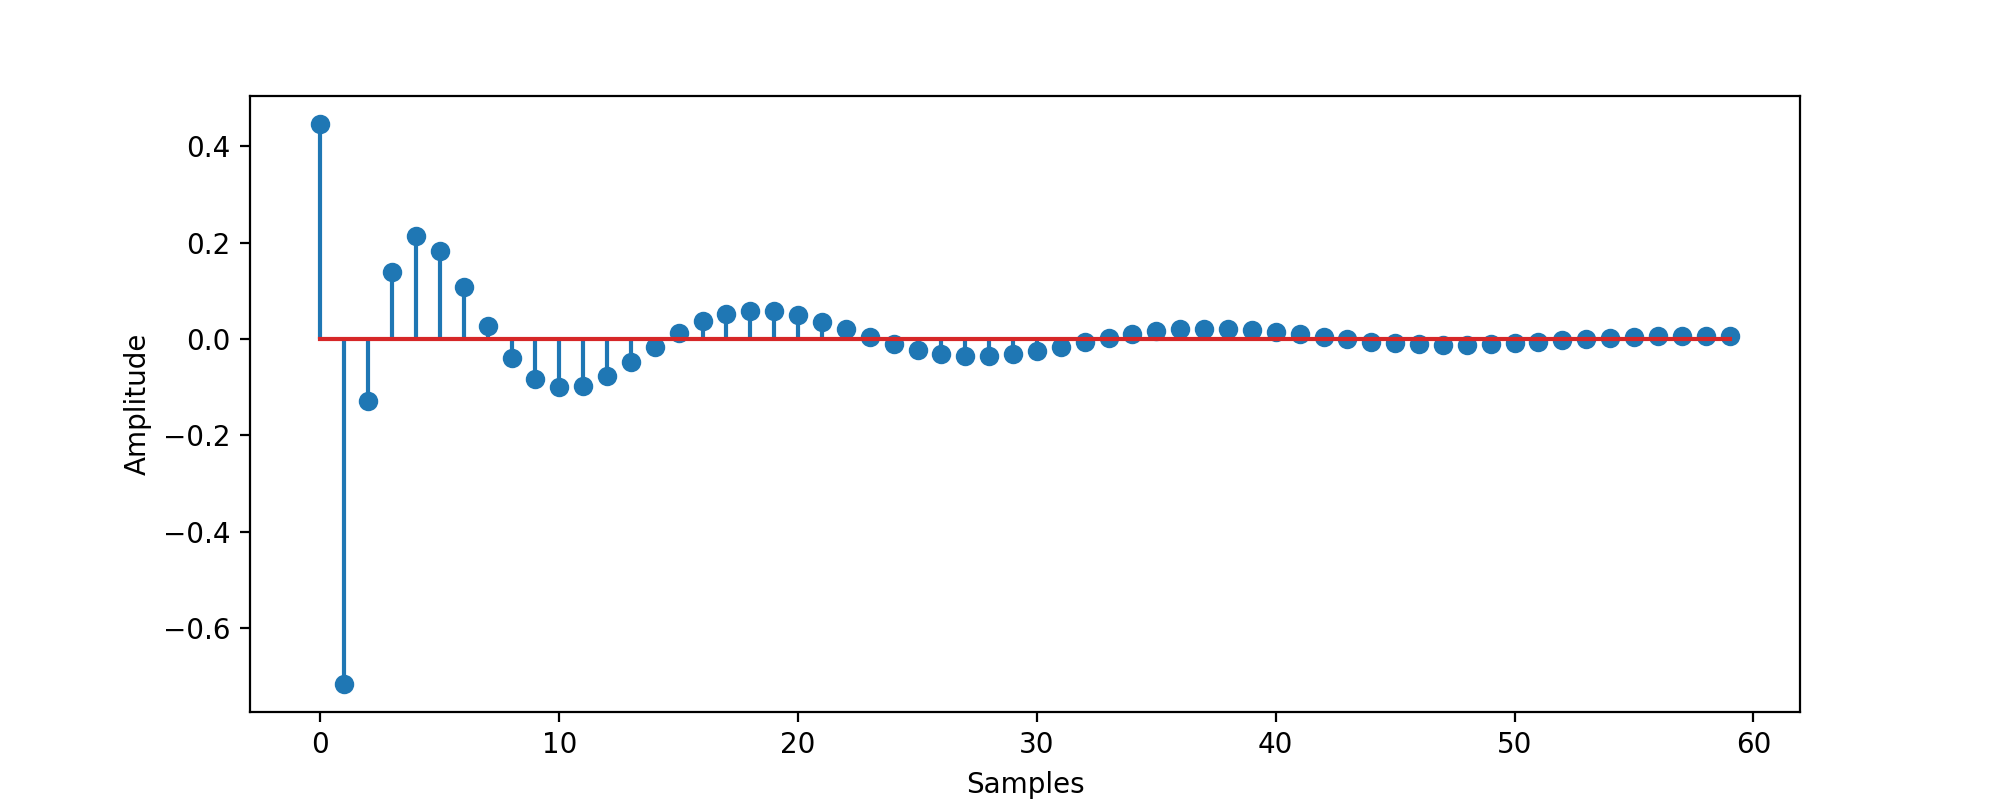

/var/folders/qz/cx605xfd6hg3dyw77ss7dhc80000gn/T/ipykernel_75549/3679311117.py:50: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(x, use_line_collection=True)


<IPython.core.display.Javascript object>


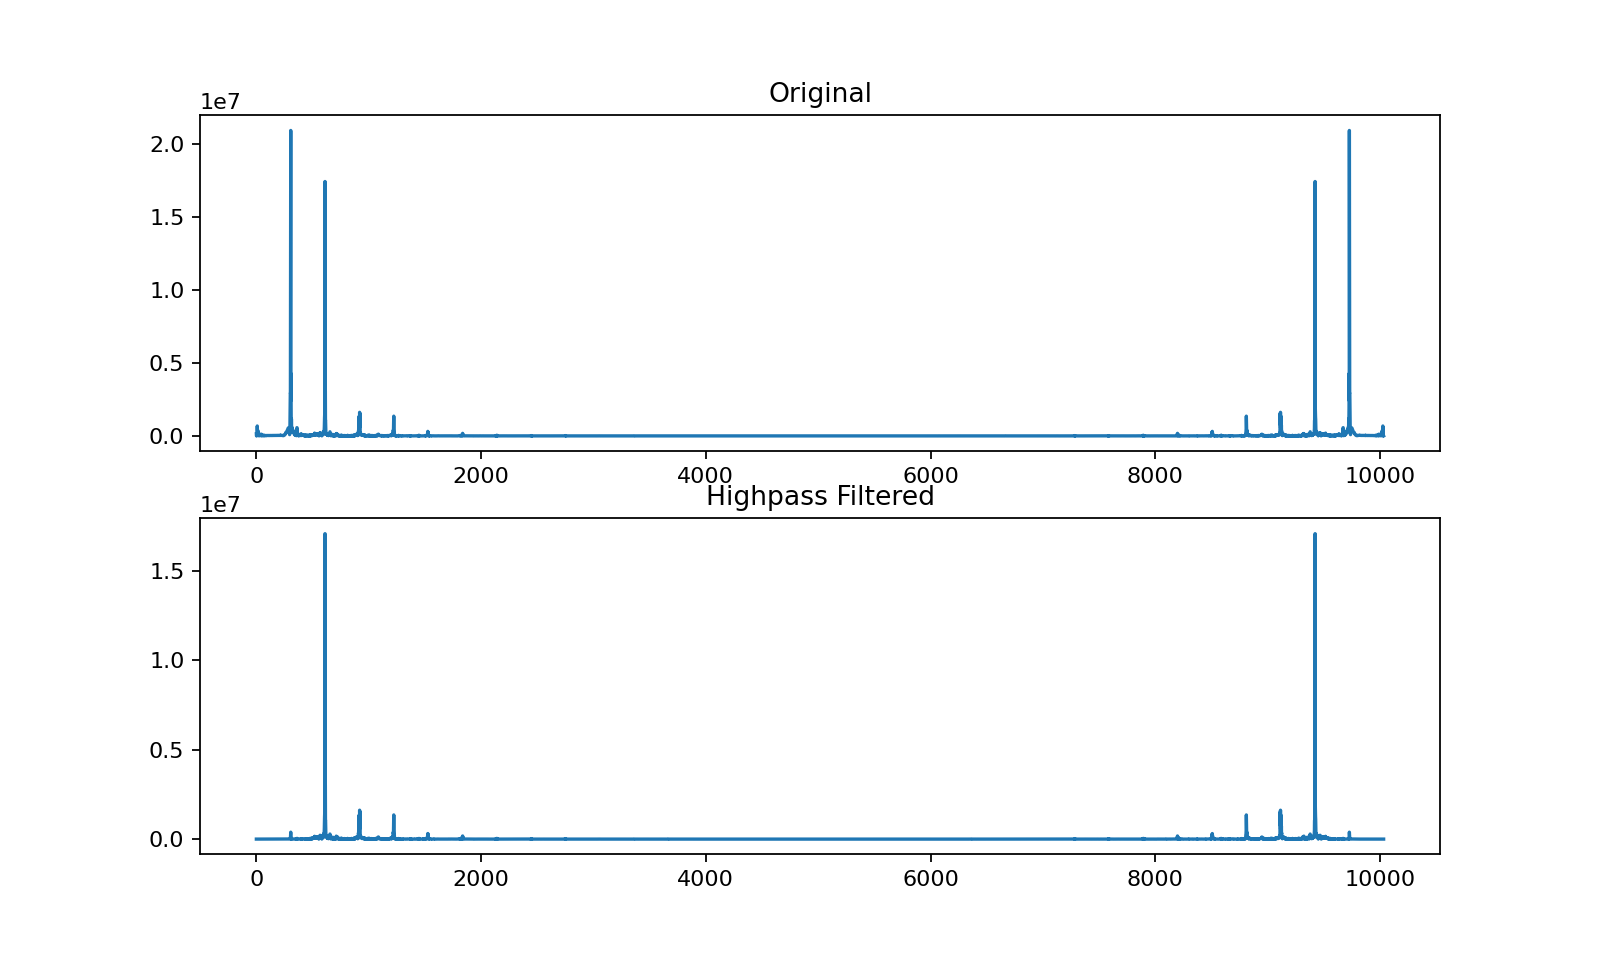

<IPython.core.display.Javascript object>


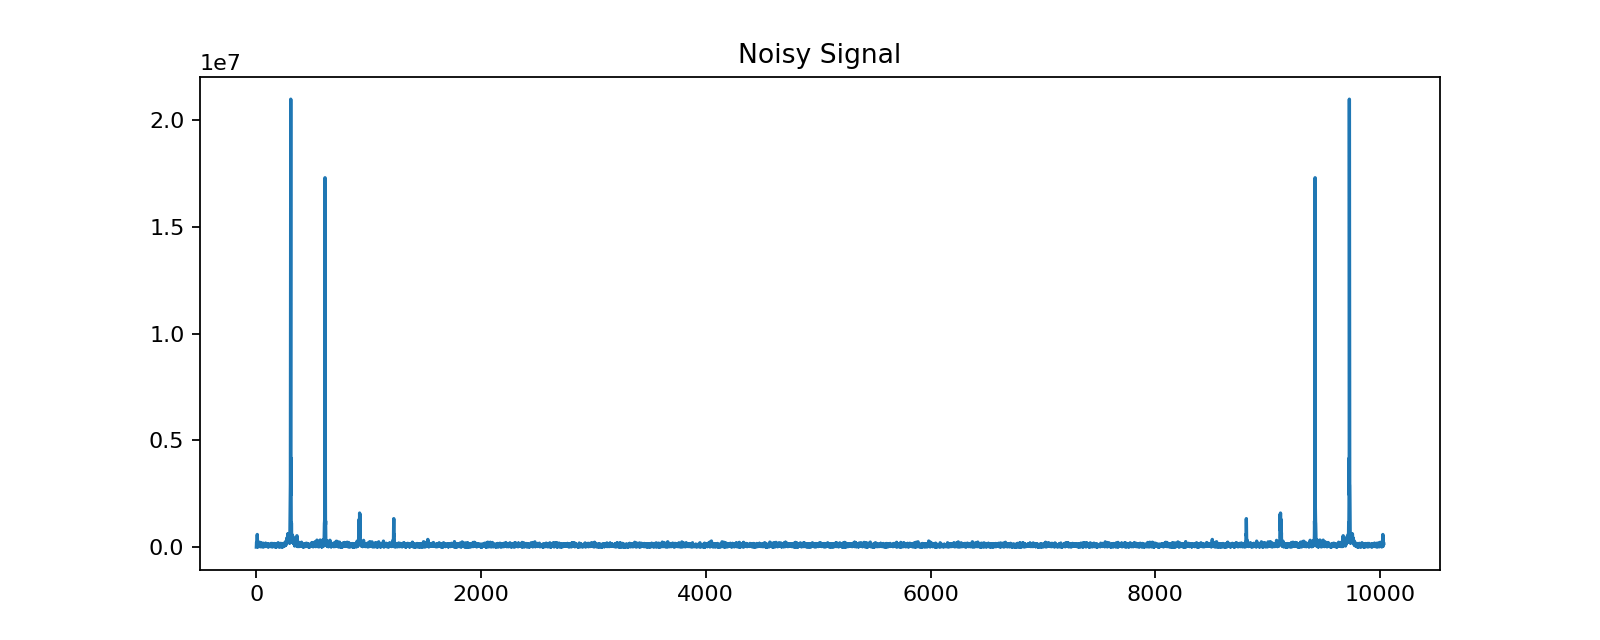

<IPython.core.display.Javascript object>


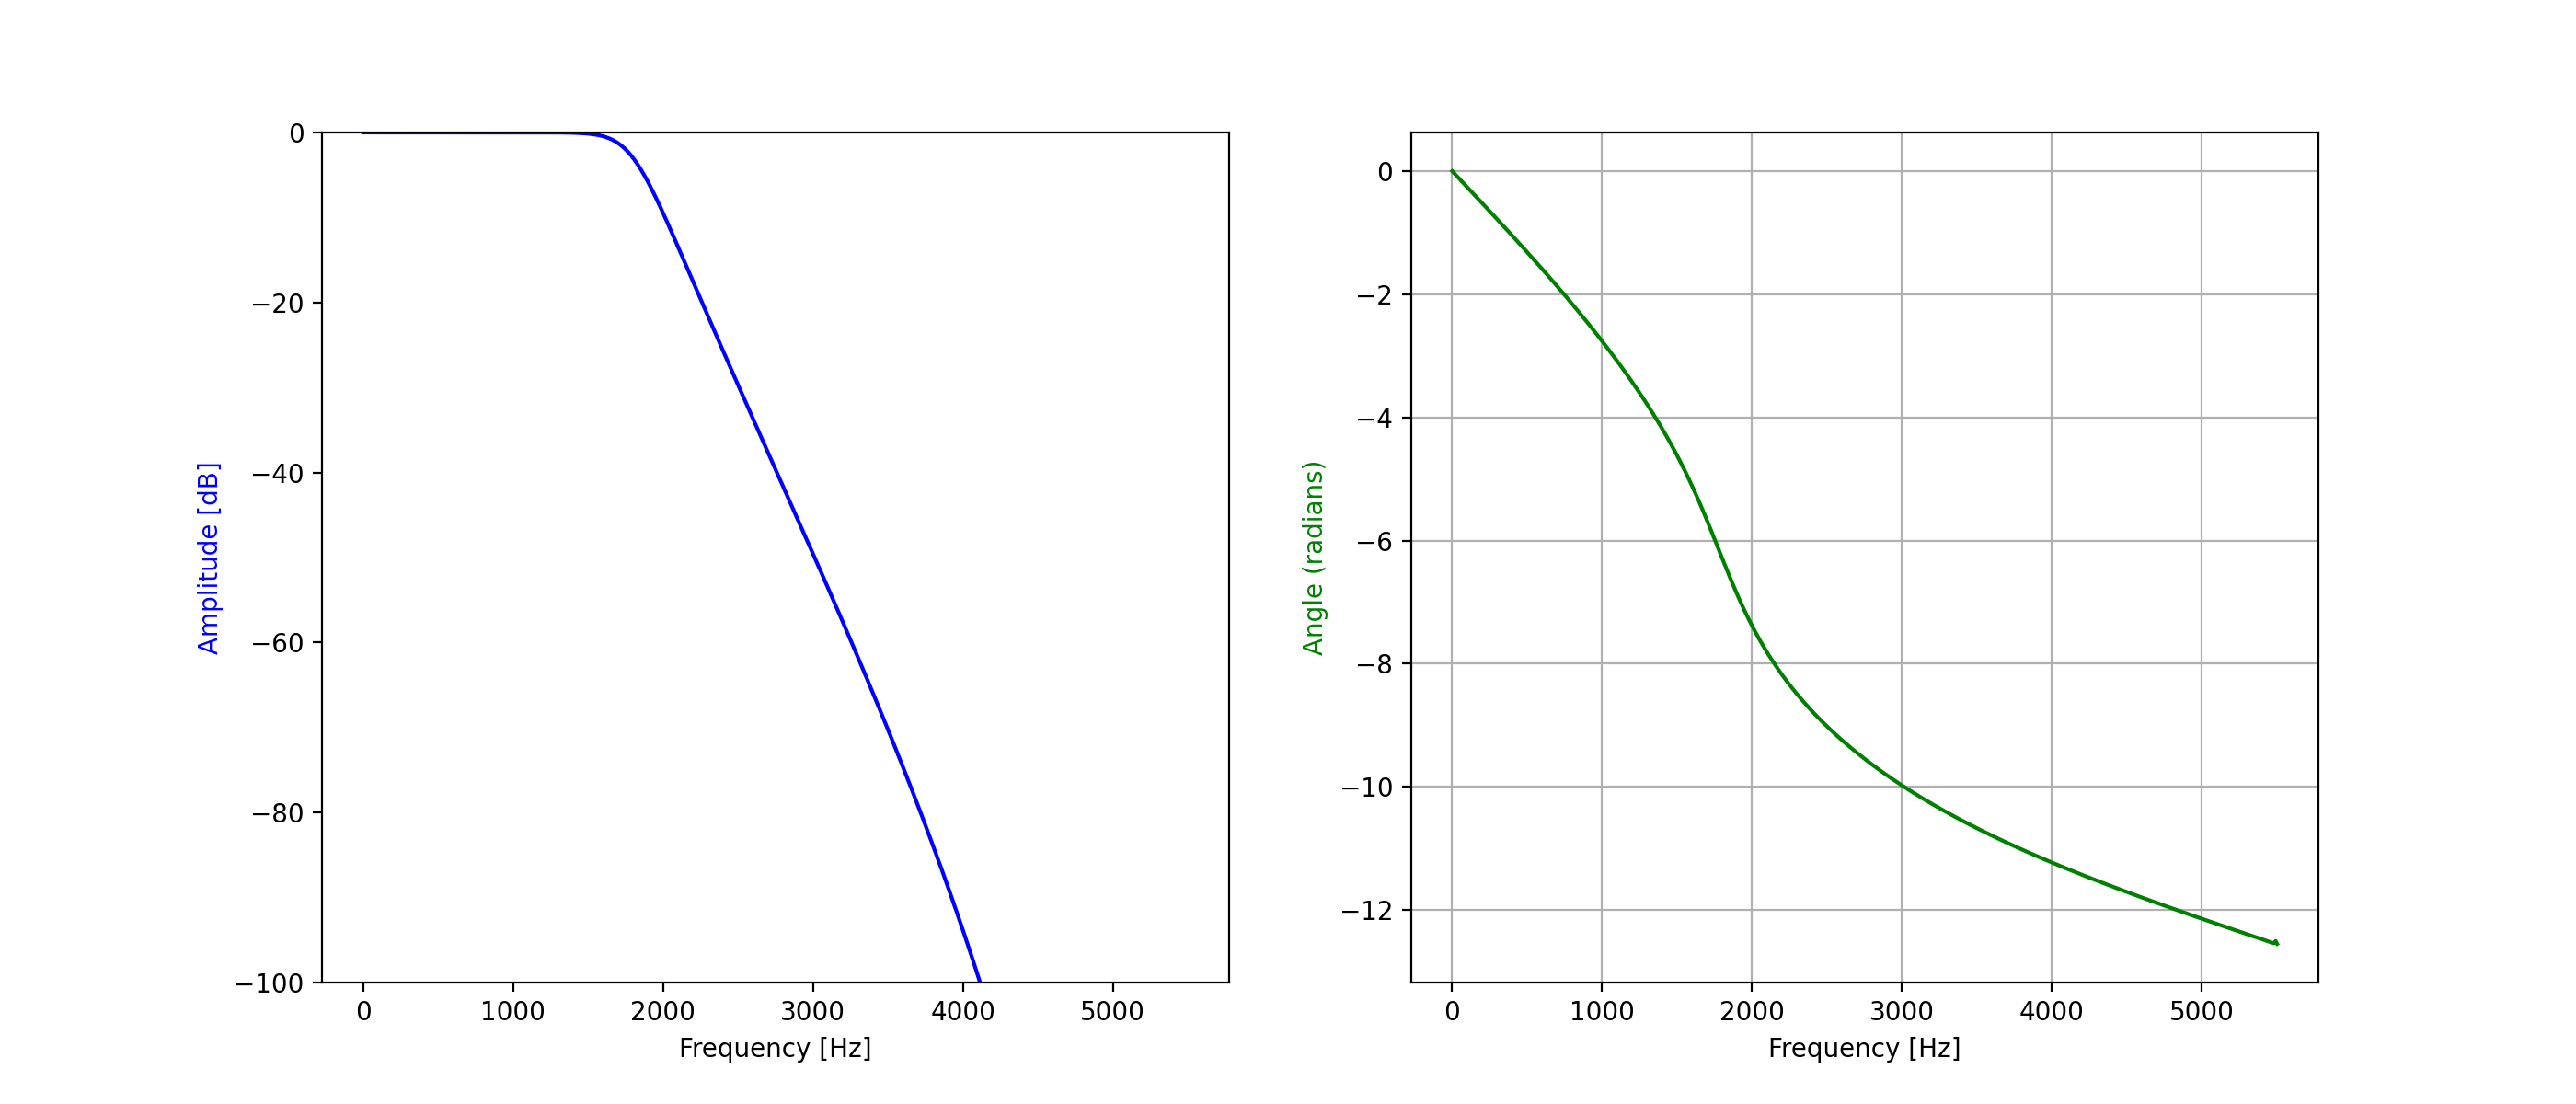

<IPython.core.display.Javascript object>


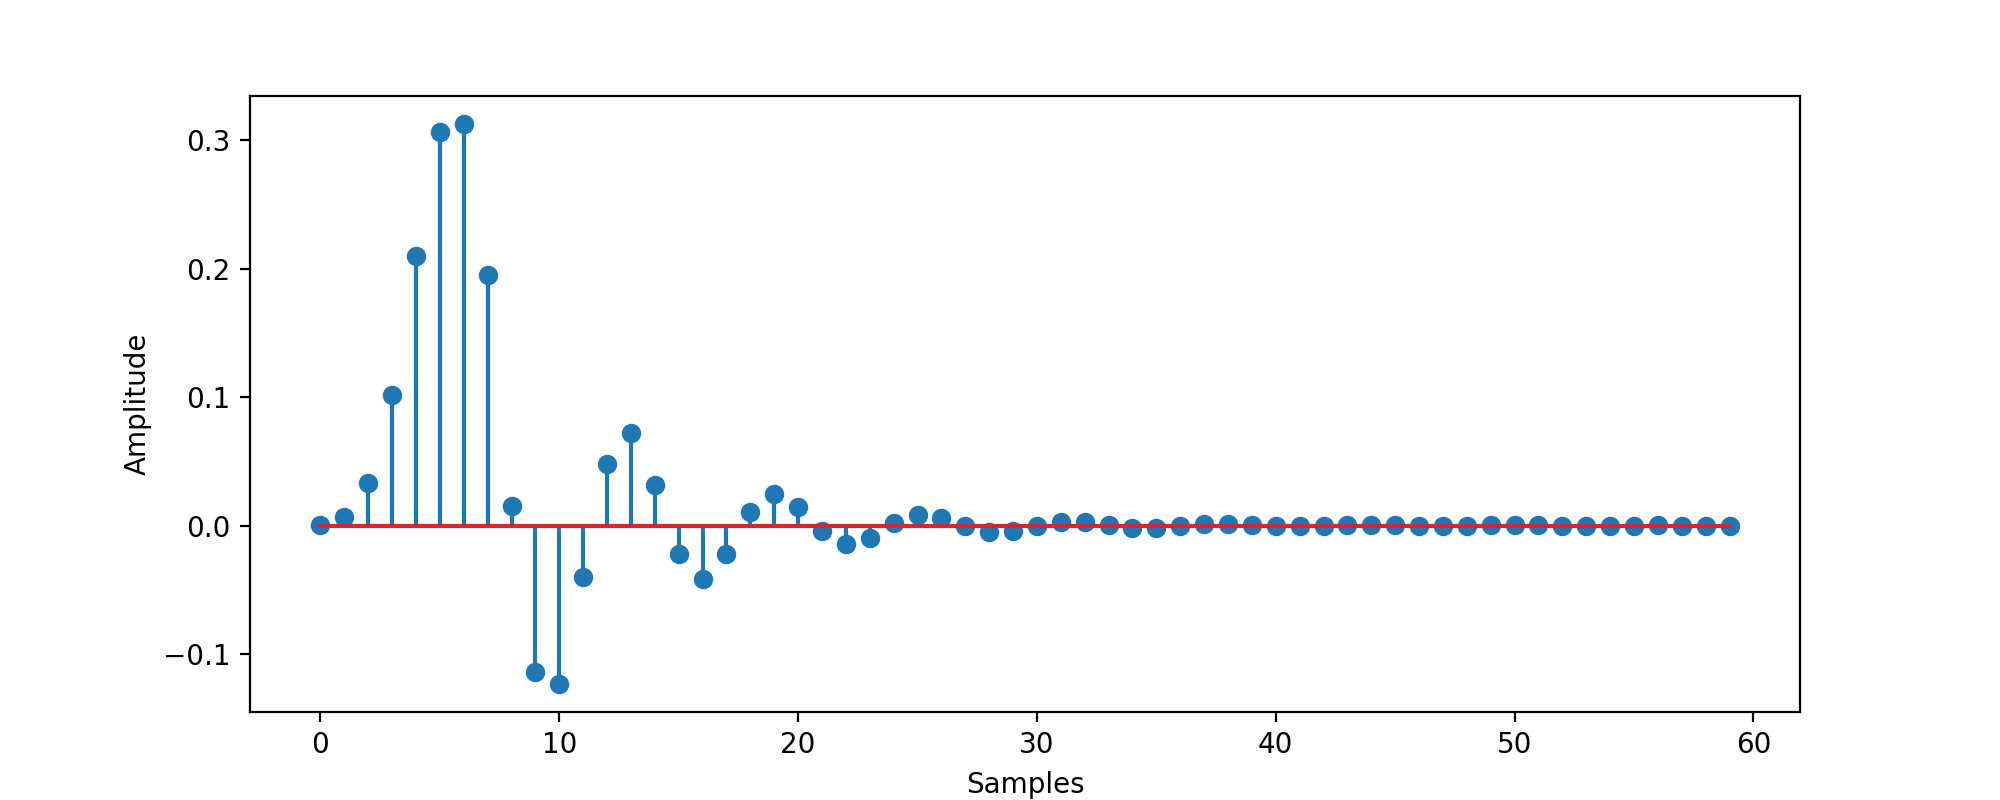

<IPython.core.display.Javascript object>


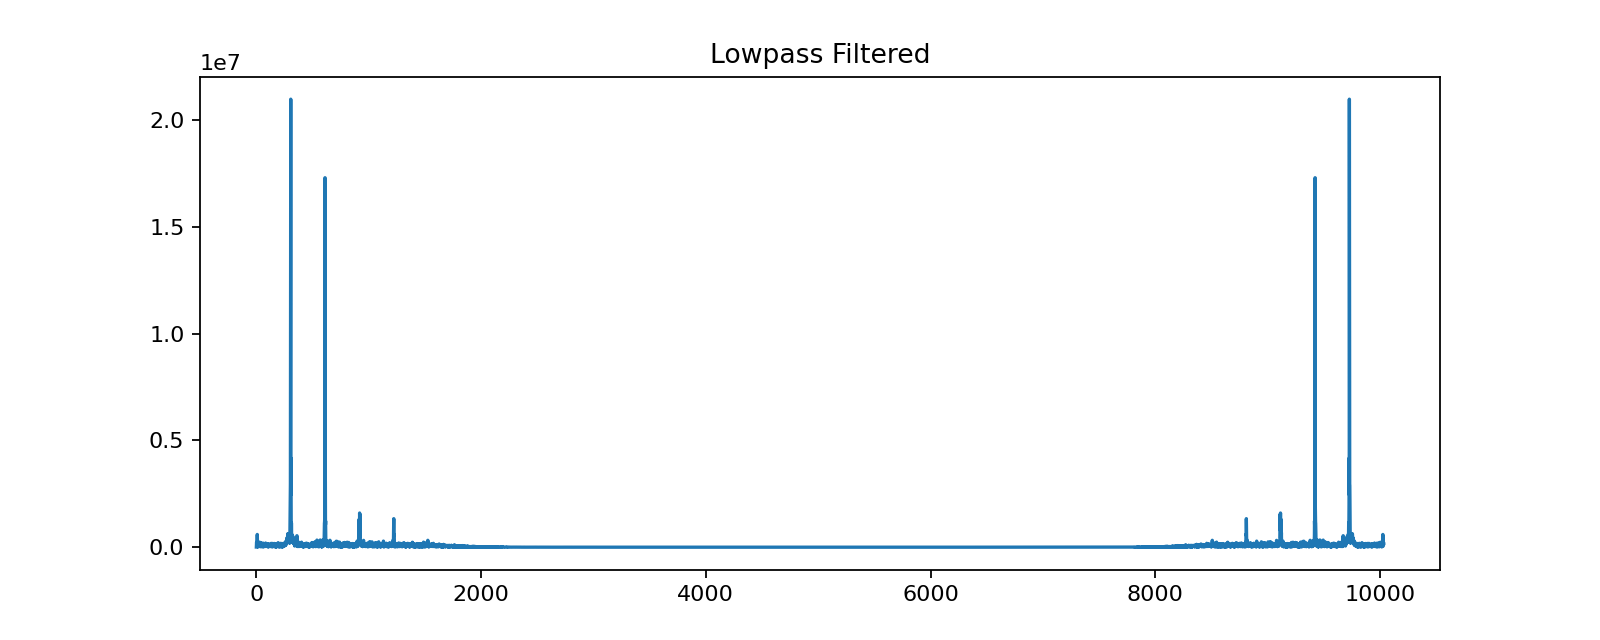

In [4]:
# Assignment 3 - Filtering an Audio Signal


# Part A
# Read in the horn sound
fs, horn = wavfile.read('horn11short.wav')
horn = horn.astype(float)  # convert to float

# Design a highpass Butterworth filter
fc = 550  # Cut-off frequency of the filter
w_c = 2*fc/fs  # Normalize the frequency
b, a = signal.butter(8, w_c, 'high')  # Order 8

# Plot the magnitude response and the impulse response
plot_mag_freq_response(b, a, True, fs)
plot_impulse_response(b, a, 60)

# Filter the signal
horn_highpass = signal.lfilter(b, a, horn)

# Compute the FFT of the original and the filtered signal
horn_fft = np.fft.fft(horn)
horn_highpass_fft = np.fft.fft(horn_highpass)

# Plot the log magnitude frequency content
plt.figure(figsize=(10, 6), dpi = 80)
plt.subplot(2, 1, 1)
plt.plot(np.abs(horn_fft))
plt.title('Original')
plt.subplot(2, 1, 2)
plt.plot(np.abs(horn_highpass_fft))
plt.title('Highpass Filtered')
plt.show()

# Play the original and the filtered waveforms
sa.play_buffer(horn.astype(np.int16), 1, 2, fs).wait_done()
sa.play_buffer(horn_highpass.astype(np.int16), 1, 2, fs).wait_done()

# Part B
# Create a noisy version of the horn sound
noise = 1000 * np.random.randn(len(horn))
horn_noisy = horn + noise

# Plot the frequency content
horn_noisy_fft = np.fft.fft(horn_noisy)
plt.figure(figsize=(10, 4), dpi = 80)
plt.plot(np.abs(horn_noisy_fft))
plt.title('Noisy Signal')
plt.show()

# Play the resulting signal
sa.play_buffer(horn_noisy.astype(np.int16), 1, 2, fs).wait_done()

# Part C
# Design a lowpass filter
fc = 1800  # Cut-off frequency
w_c = 2*fc/fs  # Normalize the frequency
b, a = signal.butter(8, w_c, 'low')  # Order 8

# Plot the magnitude response and the impulse response
plot_mag_freq_response(b, a, True, fs)
plot_impulse_response(b, a, 60)

# Filter the signal
horn_lowpass = signal.lfilter(b, a, horn_noisy)

# Plot the frequency content of the filtered signal
horn_lowpass_fft = np.fft.fft(horn_lowpass)
plt.figure(figsize=(10, 4), dpi = 80)
plt.plot(np.abs(horn_lowpass_fft))
plt.title('Lowpass Filtered')
plt.show()

# Play the resulting signal
sa.play_buffer(horn_lowpass.astype(np.int16), 1, 2, fs).wait_done()

###  Discussion

In part A, filtering out the first harmonic of the horn signal reduces the loudness, but it doesn’t change the perceived note.  Explain why this is. Discuss the differences in the impulse responses of the HPF and LPF.

### Answer
Filtering out the first harmonic of the horn signal only removes the frequency component that corresponds to the first harmonic. The perceived note is determined by the fundamental frequency of the signal, which is not affected by the highpass filter. 

The impulse response of a highpass filter has a positive peak followed by a negative peak, while the impulse response of a lowpass filter has a positive peak followed by smaller positive peaks. This is because a highpass filter amplifies high frequency components and attenuates low frequency components, while a lowpass filter does the opposite.



## Assignment 4 -- Implementing a 3-Band Audio Equalizer

In this assignment, you will design a music equalizer, which breaks the sound file into multiple frequency bands by filtering, weighting, and summing to reconstruct the signal. To keep it simple, the equalizer will have only 3 bands, as illustrated in the background document: an LPF, a BFP and an HPF. This assignment will have four parts, A-D. 

**A.**  Design 3 5th-order Butterworth filters using the cut-off frequencies: 𝝅/𝟒 and 𝝅/𝟐. Plot the magnitude response of the 3 filters together in one plot

**B.**  Write a function that takes as input a sound signal and three gains in dB, and outputs an equalized version of the signal. The function should use the filters that you designed to create 3 different components, then multiply each component by its respective gain (converted from dB to linear scale using your prelab result), and then sum up the re-weighted components to get the equalized result. 

**C.**  Read in music.wav file provided. Apply the equalizer to the music with 𝑮𝟏 = 𝑮𝟐 = 𝑮𝟑 = 𝟎 𝒅𝑩 and play the output. Verify that it sounds the same as the original input.

**D.** Experiment with different sets of gains (for example 𝐺1 = 𝐺2 = 0 𝑑𝐵 and 𝐺3 = -40 𝑑𝐵). Create two examples where the filtered version sounds different.



<IPython.core.display.Javascript object>


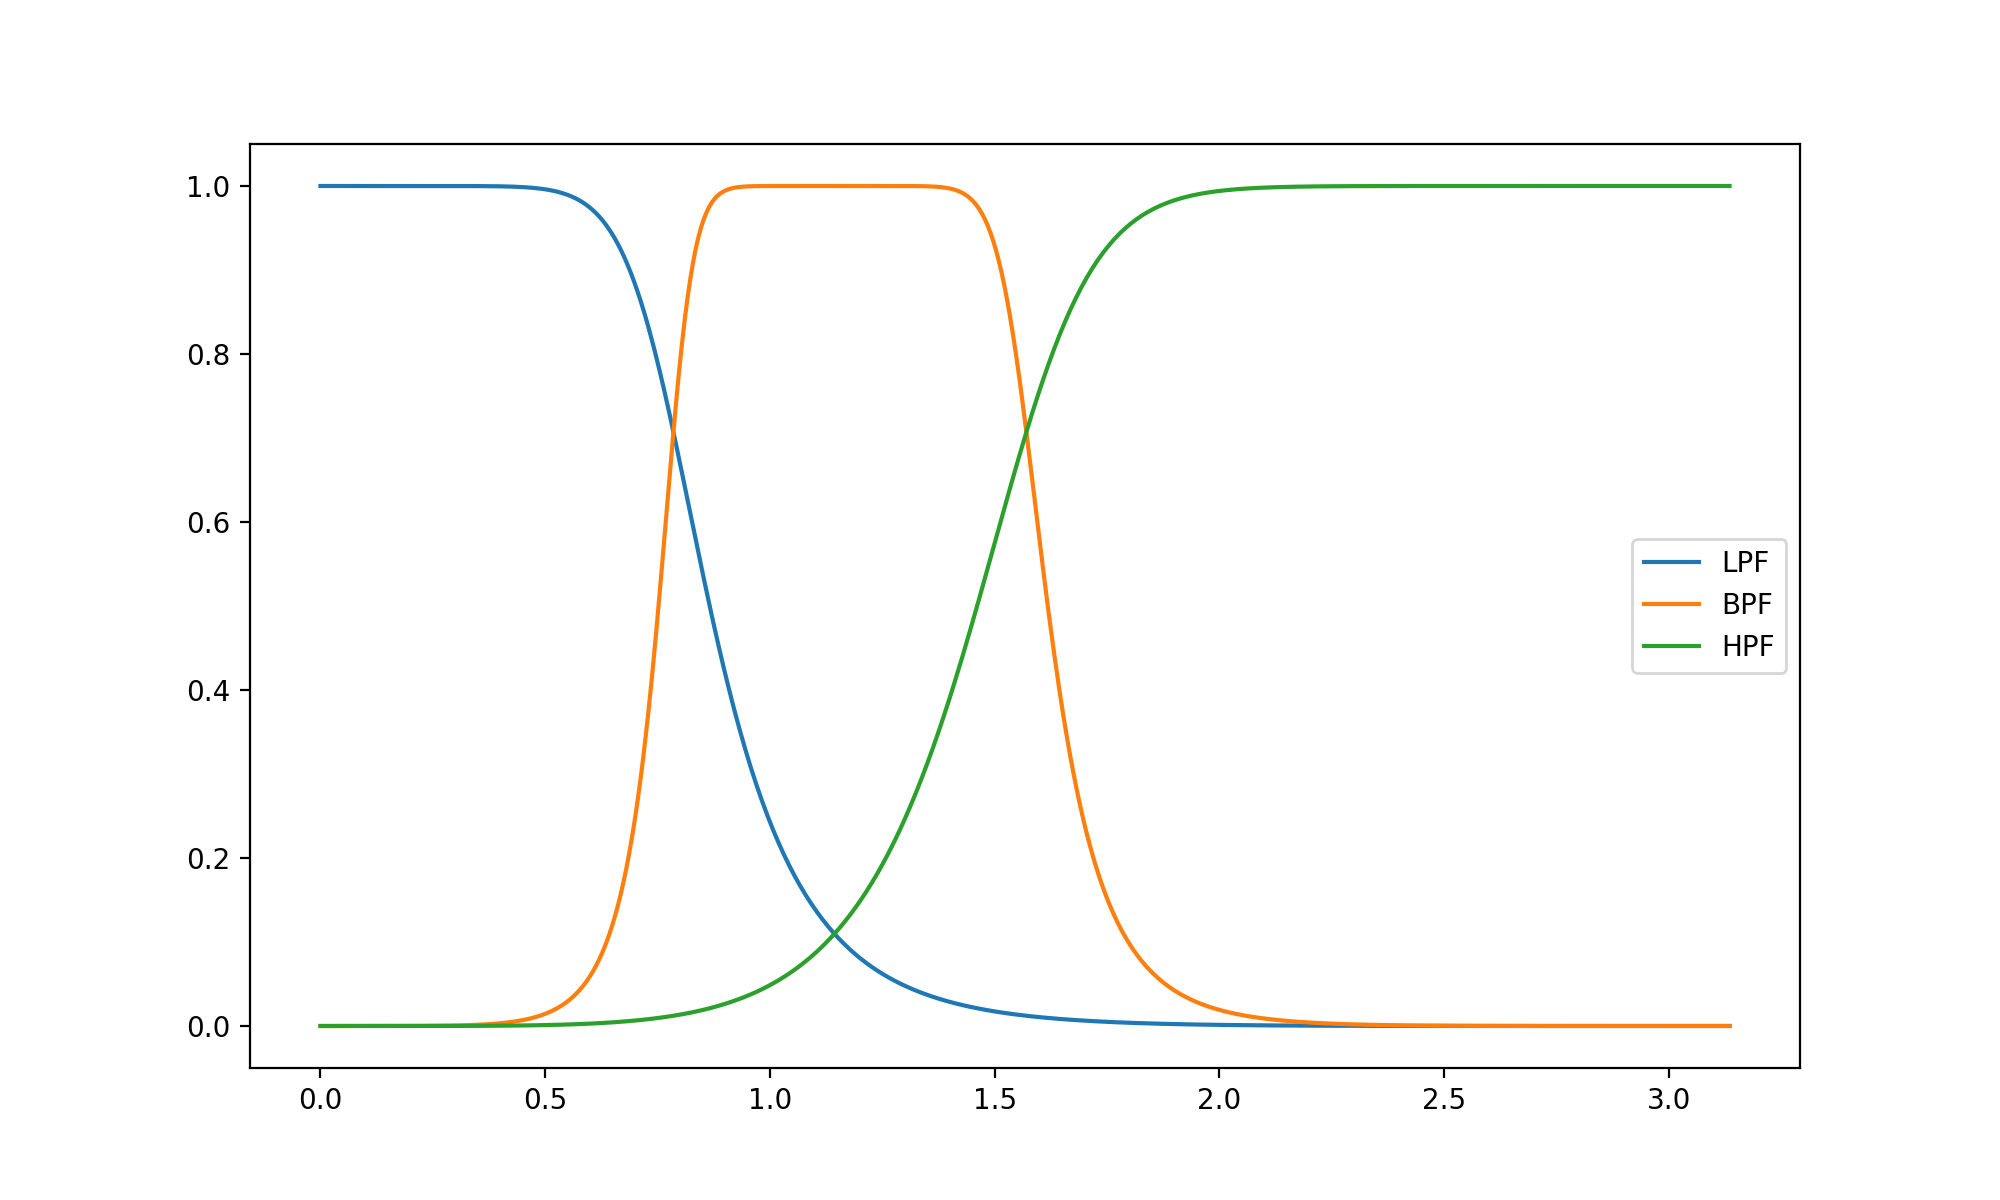

In [5]:
# Assignment 4 - Comparing frequency content of a signal

# Part A
# Design 3 5th-order Butterworth filters
b_lpf, a_lpf = signal.butter(5, 0.25, 'low')  # Low pass filter
b_bpf, a_bpf = signal.butter(5, [0.25, 0.5], 'band')  # Band pass filter
b_hpf, a_hpf = signal.butter(5, 0.5, 'high')  # High pass filter

# Plot the magnitude response of the 3 filters together in one plot
plt.figure(figsize=(10, 6))
for b, a, label in [(b_lpf, a_lpf, 'LPF'), (b_bpf, a_bpf, 'BPF'), (b_hpf, a_hpf, 'HPF')]:
    w, h = signal.freqz(b, a)
    plt.plot(w, abs(h), label=label)
plt.legend()
plt.show()

# Part B
# Function that takes as input a sound signal and three gains in dB
def audio_equalizer(audio, G1, G2, G3):
    # Convert gains from dB to linear scale
    G1 = 10**(G1/20)
    G2 = 10**(G2/20)
    G3 = 10**(G3/20)
    # Filter the audio signal
    audio_lpf = signal.lfilter(b_lpf, a_lpf, audio)
    audio_bpf = signal.lfilter(b_bpf, a_bpf, audio)
    audio_hpf = signal.lfilter(b_hpf, a_hpf, audio)
    # Apply gains
    audio_lpf *= G1
    audio_bpf *= G2
    audio_hpf *= G3
    # Sum up the re-weighted components
    equalized_audio = audio_lpf + audio_bpf + audio_hpf
    return equalized_audio

# Part C
# Read in music.wav file
fs, music = wavfile.read('music.wav')
music = music.astype(float)  # convert to float
# Apply the equalizer with G1 = G2 = G3 = 0 dB
equalized_music = audio_equalizer(music, 0, 0, 0)
# Play the output
sa.play_buffer(equalized_music.astype(np.int16), 1, 2, fs).wait_done()

# Part D
# Experiment with different sets of gains
for G1, G2, G3 in [(0, 0, -40), (10, -10, 0)]:
    equalized_music = audio_equalizer(music, G1, G2, G3)
    sa.play_buffer(equalized_music.astype(np.int16), 1, 2, fs).wait_done()

###  Discussion

Discuss what types of gains lead to an audible difference. Are there any constraints you need to put on the gains?

### Answer
Different sets of gains can lead to an audible difference in the filtered version of the audio signal. For example, increasing the gain of the highpass filter while decreasing the gain of the lowpass filter can result in a brighter sound with more emphasis on the higher frequencies. Similarly, increasing the gain of the lowpass filter while decreasing the gain of the highpass filter can result in a darker sound with more emphasis on the lower frequencies. 

However, there are some constraints that need to be put on the gains to avoid distortion or clipping of the signal. For example, if the gain of any filter is set too high, it can cause the signal to exceed the maximum amplitude that can be represented by the bit depth of the audio file, resulting in clipping. Therefore, it is important to choose the gains carefully and ensure that they do not cause distortion or clipping of the signal.
